In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

import tensorflow as tf
from tensorflow import keras

data = datasets.load_diabetes()

In [2]:
data.data.shape

(442, 10)

# Dataset exploration:

### load diabetes information:

####    A regression data set.
####    Number of Instances: 442
####    Number of Features: 10
####    Target Names: disease progression
####  Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
       
####    Missing Feature Values: None
####    Targets: integer 25 - 346
       
       


In [3]:
pdata = pd.DataFrame(data.data, columns=data.feature_names)
pdata["target"] = data.target

In [4]:
data.data.shape

(442, 10)

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# Train and Test

In [7]:
X, y = data.data, data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Neural Network:

In [8]:
import time
start_time = time.time()

model = tf.keras.Sequential([
    keras.layers.Dense(32, input_shape=(10,), activation='relu', kernel_regularizer='l2'), # Hidden layer
    keras.layers.Dense(10, activation='relu', kernel_regularizer='l2'), # Hidden layer
    keras.layers.Dense(10, activation='relu', kernel_regularizer='l2'), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
    keras.layers.Dense(1, activation='linear') # Output layer
])

# opt = tf.keras.optimizers.SGD(
#     learning_rate=0.01,
#     momentum=0.0,
#     nesterov=False,
#     name='SGD',
# #     **kwargs
# )

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Epoch 1/100
12/12 [==============================] - 2s 43ms/step - loss: 29059.9199 - mean_squared_error: 29059.5234 - val_loss: 29069.1973 - val_mean_squared_error: 29068.7969
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 29038.5156 - mean_squared_error: 29038.1211 - val_loss: 29045.3984 - val_mean_squared_error: 29045.0000
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 29011.5430 - mean_squared_error: 29011.1465 - val_loss: 29013.4922 - val_mean_squared_error: 29013.0918
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 28975.0957 - mean_squared_error: 28974.6973 - val_loss: 28969.2930 - val_mean_squared_error: 28968.8926
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 28924.1211 - mean_squared_error: 28923.7188 - val_loss: 28909.5469 - val_mean_squared_error: 28909.1426
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 28854.3770 - mean_squared_error: 28853.

In [9]:
y_predicted = model.predict(X_test)
# cm

In [10]:
print(y_test[0])
print(y_predicted[0])

185.0
[157.95584]


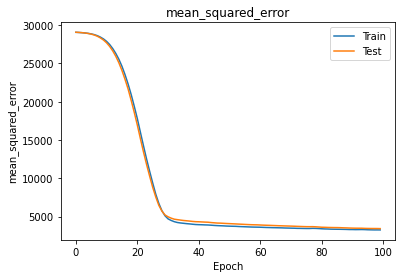

In [11]:
TrainError = np.array(hist.history['mean_squared_error'])
TestError = np.array(hist.history['val_mean_squared_error'])

plt.plot(TrainError)
plt.plot(TestError)
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

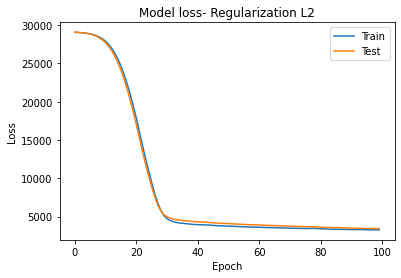

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss- Regularization L2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [20]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [21]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 0.111s
Test R2 score: 0.35


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (397). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


Computing partial dependence plots...
done in 1.188s


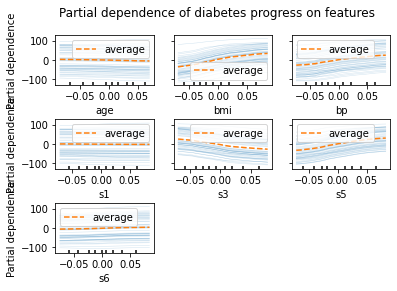

In [43]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

print("Computing partial dependence plots...")
tic = time()
features = ['age', 'bmi', 'bp', 's1', 's3', 's5', 's6'] #  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
#  fx = feature_names.index(fx)
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of diabetes progress on features"
)
display.figure_.subplots_adjust(hspace=0.7)

## 2D interaction

Computing partial dependence plots...
done in 0.526s


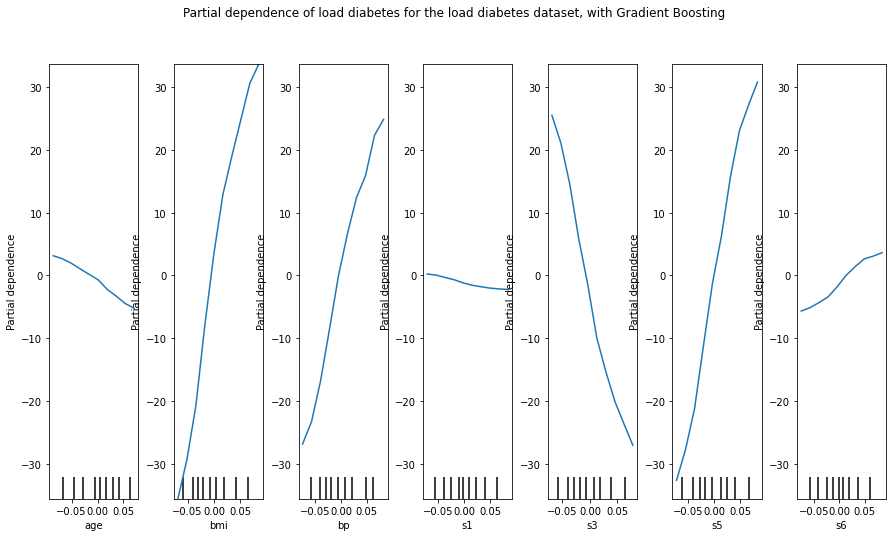

In [38]:
features = ['age', 'bmi', 'bp', 's1', 's3', 's5', 's6']
print("Computing partial dependence plots...")
tic = time()
_, ax = plt.subplots(ncols=7, figsize=(15, 8))
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="average",
    n_jobs=2,
    grid_resolution=10,
    ax=ax,
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of load diabetes for the load diabetes dataset, with Gradient Boosting"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)